In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
seaborn.set()

(-1, 3.5)

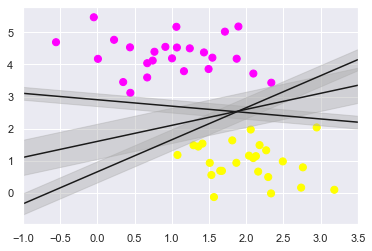

In [17]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [24]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

def plot_svc_decision_function(clf, ax=None):
   
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    yy = a * xx - (clf.intercept_[0]) / w[1]
   # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.Paired)

    plt.axis('tight')
    print(clf.decision_function(X))

[ 1.40603714  1.3591769  -2.51058235 -2.13942243  2.18430606  3.60280644
  3.79864307  0.95048419  2.06722659 -4.36242933 -3.33917354 -3.33016044
 -2.80610364  2.78359637 -1.78232701 -1.7657915  -2.3183929   3.0466215
 -0.99999987 -2.86848992  2.63755919  1.89023869  2.25718297  2.62966853
  2.41900855 -0.9999994  -2.22302791 -3.40694626  2.78168963 -1.44976041
  1.64660828 -2.95807889 -2.72951819 -2.56144709 -3.51816073  2.33579112
  2.11037259 -3.69706531  3.75909944 -1.60942589  1.81798745 -2.25885574
  3.7399511   1.52000771 -2.3538635   1.44881542  1.06318842 -1.48566549
  2.73630505 -2.69205979]


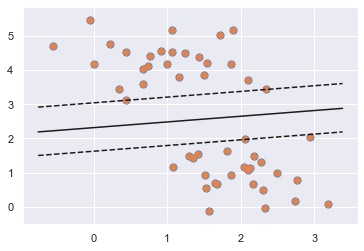

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='spring')
plot_svc_decision_function(clf)

[ 0.53209714  0.65090608 -1.39561783 -1.05638366  1.15840336  2.08729566
  2.34219638  0.53697702  1.08042791 -2.83510615 -1.70516084 -2.22872977
 -1.67049033  1.25513856 -1.0138685  -1.12294687 -1.54487182  1.65580382
 -1.00000002 -1.75620783  1.2332812   1.07476818  0.98732572  1.22127316
  1.41524201 -0.32855747 -1.52377317 -2.54314515  1.47709843 -0.63626777
  0.92292225 -1.96893455 -1.57121957 -1.92576882 -1.72925809  1.15284227
  1.13472264 -2.11294871  2.02123663 -1.22089575  0.61663814 -1.23106247
  1.73984207  0.56832589 -1.47030007  0.51075729  0.90689345 -1.27410807
  1.66761327 -1.72108379]


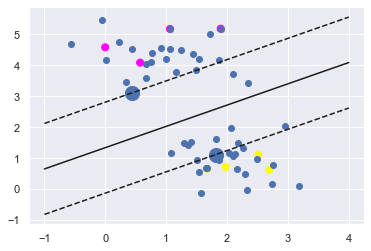

<function __main__.plot_svm(N=100)>

In [27]:
from IPython.html.widgets import interact

def plot_svm(N=100):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='b')
    
interact(plot_svm, N=[10, 200], kernel='linear')